# What does the coronavirus pandemic mean for transport fuel use in the UK?
Looking at fuel consumption data and coronavirus traffic data

In [200]:
# Importing packages

# Data importing
import requests
# import odf_py

# Data wrangling and processing
import pandas as pd
import numpy as np

# Data viz
import seaborn as sns
from matplotlib import pyplot as plt

### Steps involved:
1. Import historic vehicle mileage data, process and clean up
2. Import historic vehicle fuel consumption data and clean up
3. Explore relationship between miles and fuel
4. Import covid traffic data, create prediction for total vehicle miles
5. Predict covid effect on petrol & diesel consumption

### Step 1) Historic vehicle mileage data

The Department for Transport (DfT) collects road traffic statistics, and has a historic vehicle mileage data series: table TRA0101. 

**Road traffic (vehicle miles) by vehicle type in Great Britain, annual from 1949**

In [688]:
tra_url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/916258/tra0101.ods'
vmt = pd.read_excel(tra_url)

# column Unnamed 1 seems to be empty
vmt = vmt.drop(columns = ['Unnamed: 1', 'Unnamed: 7'])

#Better column names
new_columns = ['year', 'cars', 'lcvs', 'hgvs', 'motorcycles', 'buses_coaches', 'all_motor_vehs']

#Remove bumpf at top of sheet
vmt = vmt[6:].reset_index(drop=True)

# Rename columns
vmt.columns = new_columns

# Remove bumpf from bottom of sheet
vmt = vmt[:71]

# Make data types numeric
vmt = vmt.astype(float)

vmt.head()

,year,cars,lcvs,hgvs,motorcycles,buses_coaches,all_motor_vehs
0,1949.0,12.6,4.0,7.8,1.9,2.5,28.9
1,1950.0,15.9,4.8,7.0,2.7,2.5,33.0
2,1951.0,18.2,5.1,7.3,3.5,2.6,36.7
3,1952.0,19.0,5.4,7.0,3.7,2.6,37.8
4,1953.0,20.8,5.7,7.1,4.2,2.6,40.3


Text(0.5, 1.0, 'Vehicle miles travelled, source: DfT')

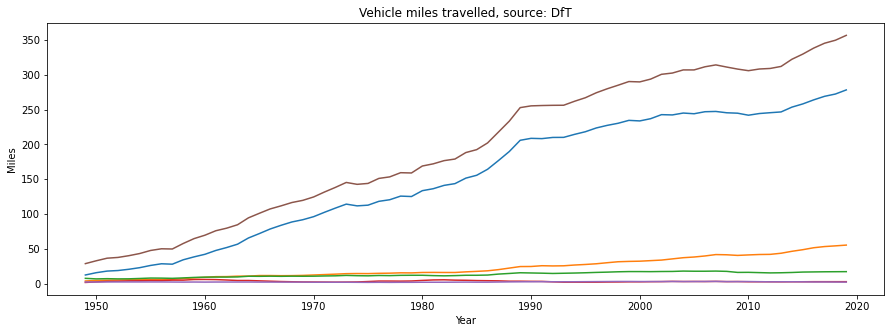

In [689]:
plt.figure(figsize = (15, 5))
sns.lineplot(data=vmt, x='year', y='cars')
sns.lineplot(data=vmt, x='year', y='lcvs')
sns.lineplot(data=vmt, x='year', y='hgvs')
sns.lineplot(data=vmt, x='year', y='motorcycles')
sns.lineplot(data=vmt, x='year', y='buses_coaches')
sns.lineplot(data=vmt, x='year', y='all_motor_vehs')
plt.ylabel('Miles')
plt.xlabel('Year')
plt.title('Vehicle miles travelled, source: DfT')

### Step 2) Import historic vehicle fuel consumption
This is available from DfT as table ENV0101.

In [215]:
fuel_url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/944684/env0101.ods'
fuel = pd.read_excel(fuel_url)

In [216]:
# fuel.head(10)

In [217]:
fuel = fuel.drop(columns=['Department for Transport statistics', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])

In [218]:
# fuel.head(20)

In [219]:
new_columns = fuel.iloc[5].to_list()
new_columns = [str(name).replace('.0', '') for name in new_columns]
new_columns[-1] = '2019'

In [220]:
# new_columns

In [221]:
fuel.columns = new_columns
fuel = fuel[6:].reset_index(drop=True)

In [222]:
# fuel.head(10)

In [223]:
fuel = fuel.T.reset_index()

In [224]:
# fuel.head(20)

In [225]:
new_columns = fuel.iloc[1].to_list()
fuel.columns = new_columns

In [226]:
fuel = fuel[2:].reset_index(drop=True)

In [227]:
# fuel.head()

In [228]:
fuel = fuel.rename(columns={'nan': 'year'})

In [229]:
fuel = fuel[:29]

In [230]:
# fuel.tail()

In [231]:
old_cols = fuel.columns.to_list()
# old_cols

In [232]:
new_cols_names = ['year', 'petrol_cars', 'petrol_lcvs', 'petrol_motorcycles', 'petrol_total', 'diesel_cars', 'diesel_lcvs', 'diesel_motorcycles', 'diesel_hgvs', 'diesel_total']
new_cols = []
for i in range(len(fuel.columns.to_list())):
    try:
        new_cols.append(new_cols_names[i])
    except:
        new_cols.append('remove')
    

In [233]:
print(new_cols)

['year', 'petrol_cars', 'petrol_lcvs', 'petrol_motorcycles', 'petrol_total', 'diesel_cars', 'diesel_lcvs', 'diesel_motorcycles', 'diesel_hgvs', 'diesel_total', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove', 'remove']


In [234]:
fuel.columns = new_cols

In [235]:
# fuel.head()

In [236]:
fuel = fuel.drop(columns=['remove'])

In [237]:
# fuel.head()

In [238]:
# fuel.dtypes

In [239]:
fuel = fuel.astype(float)

In [240]:
# fuel.head()

<AxesSubplot:xlabel='year', ylabel='petrol_total'>

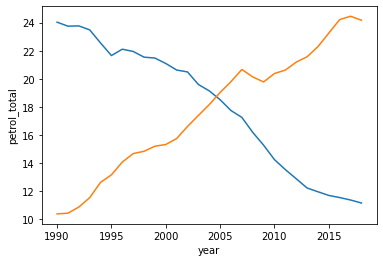

In [241]:
sns.lineplot(data = fuel, x='year', y='petrol_total')
sns.lineplot(data = fuel, x='year', y='diesel_total')

Let's add a new total column to Fuel. These measures are in millions of tonnes, so we can talk about millions of tonnes of petrol and diesel. 

In [242]:
fuel['total'] = fuel.apply(lambda x: x['petrol_total'] + x['diesel_total'], axis=1)

Text(0, 0.5, 'million tonnes fuel')

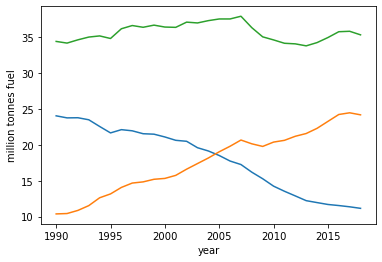

In [243]:
sns.lineplot(data = fuel, x='year', y='petrol_total')
sns.lineplot(data = fuel, x='year', y='diesel_total')
sns.lineplot(data=fuel, x='year', y='total')
plt.ylabel('million tonnes fuel')

### Step 3) Explore relationship between mileage and fuel

In [244]:
vmt.head()

,year,cars,lcvs,hgvs,motorcycles,buses_coaches,all_motor_vehs
0,1949.0,12.6,4.0,7.8,1.9,2.5,28.9
1,1950.0,15.9,4.8,7.0,2.7,2.5,33.0
2,1951.0,18.2,5.1,7.3,3.5,2.6,36.7
3,1952.0,19.0,5.4,7.0,3.7,2.6,37.8
4,1953.0,20.8,5.7,7.1,4.2,2.6,40.3


In [245]:
fuel.head()

,year,petrol_cars,petrol_lcvs,petrol_motorcycles,petrol_total,diesel_cars,diesel_lcvs,diesel_motorcycles,diesel_hgvs,diesel_total,total
0,1990.0,21.515020,2.281787,0.236513,24.033321,0.985430,1.368665,6.371474,1.641959,10.367528,34.400848
1,1991.0,21.308590,2.210694,0.228796,23.748080,1.115129,1.564293,6.057331,1.683803,10.420556,34.168636
2,1992.0,21.504010,2.068771,0.195120,23.767902,1.411471,1.750136,6.031653,1.662674,10.855934,34.623836
3,1993.0,21.372669,1.946433,0.165230,23.484332,1.806566,1.938817,6.118709,1.659594,11.523686,35.008018
4,1994.0,20.592873,1.796559,0.161219,22.550651,2.366744,2.255432,6.313903,1.681598,12.617677,35.168329


We have mileage data going back far further than fuel. 

#### Step 3 a) Get data on split between petrol and diesel cars

And we'll restrict our work to cars from now on...

In [246]:
# Filter out everything but cars, and create a new sum of fuel consumption by cars
c_fuel = fuel[['year', 'petrol_cars', 'diesel_cars']]
c_fuel['car_total'] = c_fuel.apply(lambda x: x['petrol_cars'] + x['diesel_cars'], axis=1)

<ipython-input-246-57067f2e5c25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_fuel['car_total'] = c_fuel.apply(lambda x: x['petrol_cars'] + x['diesel_cars'], axis=1)


In [247]:
# Filter out everything but cars from vmt

In [248]:
cmt = vmt[['year', 'cars']]

Now we'll import data on numbers of vehicles. DfT has table veh0203. Licensed cars at the end of the year by propulsion / fuel type, Great Britain from 1994; also United Kingdom from 2014

In [249]:
num_veh_url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/882293/veh0203.ods'
vehs = pd.read_excel(num_veh_url)

In [250]:
vehs.head()

,Department for Transport statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Vehicle Licensing Statistics (https://www.gov....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Table VEH0203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Licensed cars at the end of the year by propul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
new_cols = vehs.iloc[6].to_list()

In [252]:
vehs = vehs[8:].reset_index(drop=True)

In [253]:
vehs.columns = new_cols

In [254]:
# vehs.head()

In [255]:
vehs = vehs[:26]

In [256]:
vehs = vehs[['Year', 'Petrol', 'Diesel', 'Total']]

In [302]:
vehs.head()

,year,petrol_car_num,diesel_car_num,total_car_num
0,1994.0,19620.898,1576.196,21199.203
1,1995.0,19499.763,1891.271,21394.103
2,1996.0,20051.602,2181.634,22237.538
3,1997.0,20384.711,2440.508,22831.698
4,1998.0,20590.535,2692.904,23293.332


In [303]:
vehs = vehs.astype(float)

In [304]:
sns.lineplot(data = vehs, x='Year', y='Petrol')
sns.lineplot(data = vehs, x='Year', y='Diesel')
sns.lineplot(data = vehs, x='Year', y='Total')

ValueError: Could not interpret value `Year` for parameter `x`

In [305]:
vehs.head()

,year,petrol_car_num,diesel_car_num,total_car_num
0,1994.0,19620.898,1576.196,21199.203
1,1995.0,19499.763,1891.271,21394.103
2,1996.0,20051.602,2181.634,22237.538
3,1997.0,20384.711,2440.508,22831.698
4,1998.0,20590.535,2692.904,23293.332


In [306]:
cmt.head()

,year,cars
45,1994.0,214.4
46,1995.0,218.2
47,1996.0,223.6
48,1997.0,227.3
49,1998.0,230.3


In [307]:
c_fuel.head()

,year,petrol_cars,diesel_cars,car_total
4,1994.0,20.592873,2.366744,22.959617
5,1995.0,19.904986,2.770349,22.675335
6,1996.0,20.434517,3.186620,23.621137
7,1997.0,20.367756,3.489122,23.856878
8,1998.0,20.045429,3.598598,23.644027


Let's make all our dataframes start at 1994, since that's the earliest date in `vehs`

In [308]:
cmt = cmt[cmt['year'] > 1993]

In [309]:
c_fuel = c_fuel[c_fuel['year'] > 1993]

In [310]:
df = pd.merge(cmt, c_fuel, how='inner', on='year')

In [311]:
df.head()

,year,cars,petrol_cars,diesel_cars,car_total
0,1994.0,214.4,20.592873,2.366744,22.959617
1,1995.0,218.2,19.904986,2.770349,22.675335
2,1996.0,223.6,20.434517,3.186620,23.621137
3,1997.0,227.3,20.367756,3.489122,23.856878
4,1998.0,230.3,20.045429,3.598598,23.644027


In [312]:
df.dtypes

year           float64
cars           float64
petrol_cars    float64
diesel_cars    float64
car_total      float64
dtype: object

In [313]:
vehs.columns = ['year', 'petrol_car_num', 'diesel_car_num', 'total_car_num']

### Step 3.2) Merge our dataframes

In [314]:
df = pd.merge(df, vehs, how='inner', on='year')

In [315]:
df.head()

,year,cars,petrol_cars,diesel_cars,car_total,petrol_car_num,diesel_car_num,total_car_num
0,1994.0,214.4,20.592873,2.366744,22.959617,19620.898,1576.196,21199.203
1,1995.0,218.2,19.904986,2.770349,22.675335,19499.763,1891.271,21394.103
2,1996.0,223.6,20.434517,3.186620,23.621137,20051.602,2181.634,22237.538
3,1997.0,227.3,20.367756,3.489122,23.856878,20384.711,2440.508,22831.698
4,1998.0,230.3,20.045429,3.598598,23.644027,20590.535,2692.904,23293.332


In [316]:
df.columns = ['year',
 'car_miles',
 'petrol_cars_consumption',
 'diesel_cars_consumption',
 'car_total_consumption',
 'petrol_car_num',
 'diesel_car_num',
 'total_car_num']

In [317]:
df.head()

,year,car_miles,petrol_cars_consumption,diesel_cars_consumption,car_total_consumption,petrol_car_num,diesel_car_num,total_car_num
0,1994.0,214.4,20.592873,2.366744,22.959617,19620.898,1576.196,21199.203
1,1995.0,218.2,19.904986,2.770349,22.675335,19499.763,1891.271,21394.103
2,1996.0,223.6,20.434517,3.186620,23.621137,20051.602,2181.634,22237.538
3,1997.0,227.3,20.367756,3.489122,23.856878,20384.711,2440.508,22831.698
4,1998.0,230.3,20.045429,3.598598,23.644027,20590.535,2692.904,23293.332


In [318]:
df.tail()

,year,car_miles,petrol_cars_consumption,diesel_cars_consumption,car_total_consumption,petrol_car_num,diesel_car_num,total_car_num
20,2014.0,253.5,11.555919,10.024047,21.579966,18632.429,10730.906,29611.489
21,2015.0,258.1,11.305380,10.439238,21.744618,18511.467,11428.857,30250.294
22,2016.0,263.9,11.165761,10.878597,22.044358,18410.232,12052.146,30850.440
23,2017.0,269.0,11.001546,11.010811,22.012356,18348.092,12360.237,31200.182
24,2018.0,272.3,10.803437,10.819622,21.623059,18499.594,12397.636,31517.597


In [334]:
df = df.set_index('year')

<AxesSubplot:xlabel='year'>

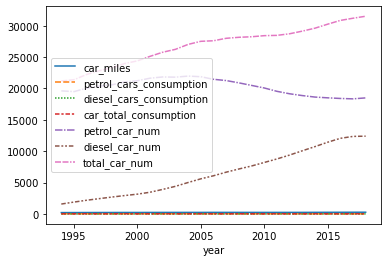

In [335]:
sns.lineplot(data=df)

Doesn't tell us very much - let's normalize

### Step 3.2.1) Let's remove the split between petrol and diesel

In [393]:
df.columns

Index(['car_miles', 'petrol_cars_consumption', 'diesel_cars_consumption',
       'car_total_consumption', 'petrol_car_num', 'diesel_car_num',
       'total_car_num'],
      dtype='object')

In [394]:
df_t = df[['car_miles', 'diesel_cars_consumption', 'diesel_car_num']]
dfc = df_t.copy()

### Step 3.3) Normalize the data

In [596]:
from sklearn import preprocessing
mmscaler = preprocessing.MinMaxScaler()

In [597]:
dfc[dfc.columns] = mmscaler.fit_transform(dfc[dfc.columns])

In [598]:
# dfc = dfc.astype(int)

In [599]:
dfc.head()

,car_miles,diesel_cars_consumption,diesel_car_num
year,,,
1994.0,0.000000,0.000000,0.000000
1995.0,0.065630,0.046691,0.029116
1996.0,0.158895,0.094848,0.055948
1997.0,0.222798,0.129844,0.079870
1998.0,0.274611,0.142509,0.103194


Text(0.5, 1.0, 'Normalized changes in car usage')

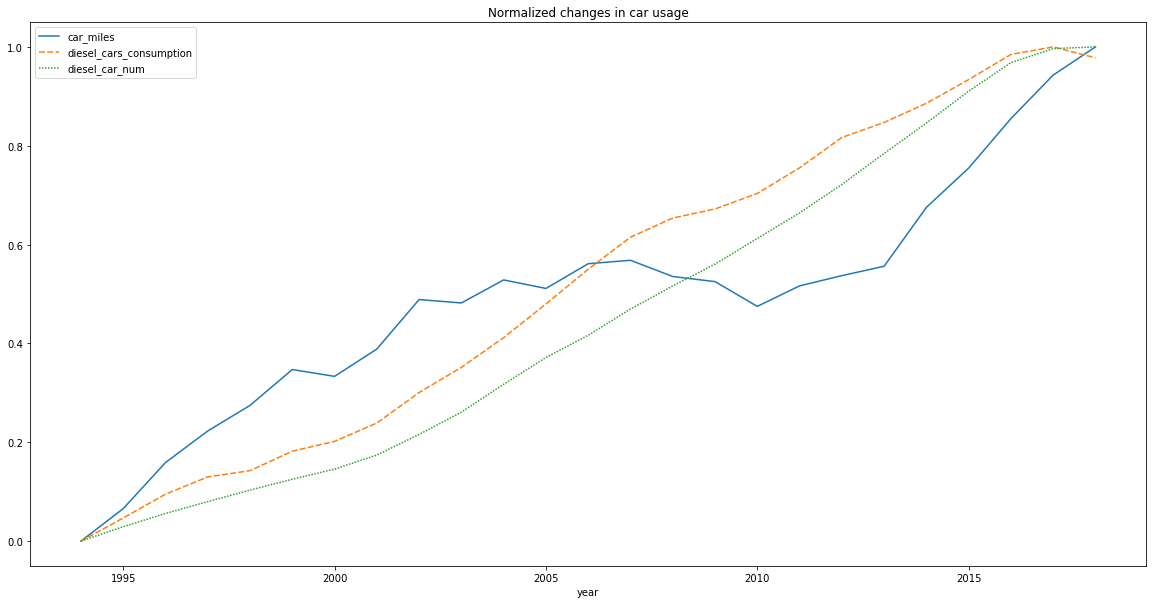

In [600]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=dfc)
plt.title('Normalized changes in car usage')

Let's use multiple linear regression.

In [601]:
# Import the packages...
from sklearn.linear_model import LinearRegression

In [602]:
# Instantiate the model...
model = LinearRegression()

In [603]:
# cars = dfc[['car_miles', 'total_car_num']].to_numpy

In [604]:
# consumption = dfc.car_total_consumption.to_numpy

In [605]:
# total_car_array = dfc.total_car_num.to_numpy

We need to split our data into training and testing arrays.


In [606]:
from sklearn.model_selection import train_test_split

In [607]:
inputs = dfc[['car_miles', 'diesel_car_num']] #.reset_index(drop=True)
outputs = dfc['diesel_cars_consumption'] #.reset_index(drop=True)

cars = total number of cars
consumption = fuel used

In [608]:
in_train, in_test, out_train, out_test = train_test_split(inputs, outputs, test_size=0.2, random_state=0)

In [609]:
dfc.columns

Index(['car_miles', 'diesel_cars_consumption', 'diesel_car_num'], dtype='object')

In [610]:
model = LinearRegression().fit(in_train, out_train)

In [611]:
print(model.predict(in_test))

[0.20407133 0.12422386 0.82444265 0.66020776 0.44355789]


In [612]:
# print(outputs)

In [613]:
print(model.score(in_test, out_test))

0.987986520226475


Ok, we have built a model with pretty good accuracy.

### Step 4) Obtaining traffic data and diesel car numbers for 2019 and 2020. 

In [614]:
dfc.tail()

,car_miles,diesel_cars_consumption,diesel_car_num
year,,,
2014.0,0.675302,0.885845,0.845979
2015.0,0.754750,0.933877,0.910476
2016.0,0.854922,0.984705,0.968074
2017.0,0.943005,1.000000,0.996544
2018.0,1.000000,0.977882,1.000000


#### Step 4 a) Covid traffic data

DfT makes this available, thankfully broken down by vehicle type.

In [615]:
covid_url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/967954/COVID-19-transport-use-statistics.ods'
cov = pd.read_excel(covid_url)

In [616]:
cov.head(10)

,Department for Transport statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,https://www.gov.uk/government/statistics/trans...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Use of transport modes: Great Britain, since 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Figures are percentages of an equivalent day o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percentage
5,Date1(weekends and bank holidays in grey),Cars2,Light Commercial Vehicles2,Heavy Goods Vehicles2,All motor vehicles2,"National Rail3,4",Transport for London Tube5,"Transport for London Bus5,7","Bus (excl. London)6,8,9","Cycling10,11"
6,2020-03-01 00:00:00,1.03,1.11,1.08,1.04,0.97,1.04,1.02,..,..
7,2020-03-02 00:00:00,1.02,1.06,1.03,1.03,0.94,0.95,0.97,..,..
8,2020-03-03 00:00:00,1.01,1.05,1.02,1.02,0.95,0.95,0.96,..,..
9,2020-03-04 00:00:00,1.01,1.04,1.03,1.01,0.95,0.95,0.97,..,..


In [617]:
columns = cov.iloc[5].to_list()
cov.columns = columns
cov = cov[6:] #.reset_index(drop=True)
cov = cov[['Date1(weekends and bank holidays in grey)', 'Cars2']]
new_cols = ['date', 'cars_traffic_perc']
cov.columns = new_cols
cov = cov[:373]

In [618]:
cov.tail(5)

,date,cars_traffic_perc
374,2021-03-04 00:00:00,0.64
375,2021-03-05 00:00:00,0.68
376,2021-03-06 00:00:00,0.66
377,2021-03-07 00:00:00,0.64
378,2021-03-08 00:00:00,0.7


In [619]:
cov['date'] = cov['date'].apply(lambda x: pd.to_datetime(x))
cov['cars_traffic_perc'] = cov['cars_traffic_perc'].apply(lambda x: pd.to_numeric(x))

In [620]:
cov.dtypes

date                 datetime64[ns]
cars_traffic_perc           float64
dtype: object

In [621]:
cov.head()

,date,cars_traffic_perc
6,2020-03-01,1.03
7,2020-03-02,1.02
8,2020-03-03,1.01
9,2020-03-04,1.01
10,2020-03-05,1.00


<AxesSubplot:xlabel='date', ylabel='cars_traffic_perc'>

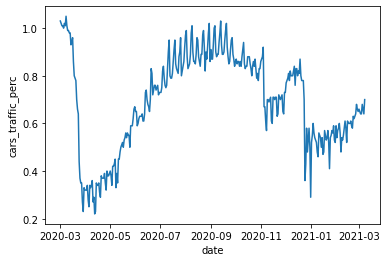

In [622]:
sns.lineplot(data = cov, x='date', y='cars_traffic_perc')

In [623]:
cov.cars_traffic_perc.mean()

0.6956032171581771

So there has been 69% of the traffic as normal. That's a big reduction.

In our normalised dataset, car miles we 1.00000 in 2019. So in 2020, we'll say that they are 0.6956032171581771.

Diesel cars were 12,286,300 in 2019. There were only an additional 261,772 registered for the first time in 2020. 

Between 2018 and 2019, the number of diesels fell by 111,000, while 500,000 new diesels were registered. This suggests that around 600,000 are scrapped every year. If 261,000 were registered in 2020, and roughly the same number scrapped, then that would be a fall of 339,000, giving a total number of diesel cars of 11,947,000.

Our normalised diesel car figure for 2018 was 1.0000. A decline to 11.947 million cars yields a normalised number of 0.9723838747222516.

In [624]:
inputs.tail()

,car_miles,diesel_car_num
year,,
2014.0,0.675302,0.845979
2015.0,0.754750,0.910476
2016.0,0.854922,0.968074
2017.0,0.943005,0.996544
2018.0,1.000000,1.000000


In [637]:
new_df = pd.DataFrame(data = {'car_miles': [1, 0.6956032171581771], 'diesel_car_num': [1.002993527508091, 0.9723838747222516]}, index=[2019, 2020])
new_df.head()

,car_miles,diesel_car_num
2019,1.000000,1.002994
2020,0.695603,0.972384


In [667]:
prediction = model.predict(new_df)

In [671]:
predict_df = pd.DataFrame(data={'diesel_cars_consumption': prediction}, index=['2019', '2020'])

In [676]:
outputs_df = pd.DataFrame(outputs).to_frame

In [679]:
type(outputs_df)

pandas.core.frame.DataFrame

In [681]:
print(type(predict_df))
print(type(outputs_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [686]:
outputs_df.append(predict_df)

,diesel_cars_consumption
1994.0,0.000000
1995.0,0.046691
1996.0,0.094848
1997.0,0.129844
1998.0,0.142509
1999.0,0.181879
2000.0,0.201824
2001.0,0.238938
2002.0,0.300555
2003.0,0.351601


<AxesSubplot:>

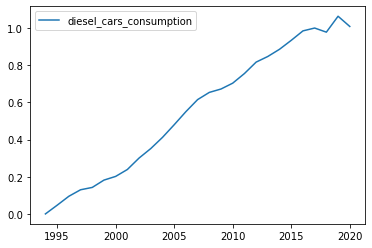

In [685]:
sns.lineplot(data = outputs_df.append(predict_df))

In [682]:
m_df = pd.concat(outputs_df, predict_df)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [687]:
dfc.tail()

,car_miles,diesel_cars_consumption,diesel_car_num
year,,,
2014.0,0.675302,0.885845,0.845979
2015.0,0.754750,0.933877,0.910476
2016.0,0.854922,0.984705,0.968074
2017.0,0.943005,1.000000,0.996544
2018.0,1.000000,0.977882,1.000000


#### Step 4b) Estimate the total number of diesel cars on the road.

For this, we turn to the vehicle licensing statistics. As of September 2020, which are the latest stats available, we have:

### Step 5) Predict what will happen to diesel demand in the UK in 2020.

In [ ]:
model.predict(0.6956032171581771)